# A Larger Reaction Mechanism

This Jupyter Notebook was written by Dan Haworth. It is intended as a tutorial to be used in parallel with Chapter 5 of the book "An Introduction to Combustion: Concepts and Applications" by Stephen R. Turns and Daniel C. Haworth. That book is referred to as "Turns 4th ed." throughout this Notebook.

This Notebook was last updated 17 February 2020.

The objective of this tutorial is to provide an example of working with a large detailed reaction mechanism in Cantera. Multicomponent fuels, and differences in ignition behavior for different fuel molecules, are also introduced. We will use the thermodynamic properties and reaction mechanism in CurranEtAl_PRF_fromLLNL.cti.

The file "CurranEtAl_PRF_fromLLNL.cti" (provided with this Notebook) must be placed in a folder or directory named "data" that is immediately below the folder or directory from which you have opened this Notebook. If you downloaded the .zip file that contains all of the tutorial Notebooks, the appropriate folder and file structure should be in place. The .cti file is also available at https://www.cerfacs.fr/cantera/mechanisms/iso-oct.php#curran.

The reader should be familiar with the material in the previous Notebook (5_3_Input_data_files) before working through this Notebook.

## 1. Primary reference fuels (PRFs)

A *primary reference fuel* (PRF) is a blend of two hydrocarbon molecules or species: n-heptane (a straight-chain alkane) and iso-octane (2,2,4-trimethylpentane, a branched-chain alkane).

n-Heptane is sometimes used as a surrogate for diesel fuel. Its ignition characteristics are similar to those of real diesel fuels (blends containing hundreds of different species) under diesel-engine-relevant conditions. In particular, n-heptane/air mixtures autoignite readily at diesel-engine-relevant temperatures and pressures. 

iso-Octane is sometimes used as a surrogate for gasoline fuel. Its ignition characteristics are similar to those of real gasoline fuels (blends containing hundreds of different species) under spark-ignition-engine-relevant conditions. In particular, iso-octane/air mixtures are highly resistant to autoignition (or *knock* - a phenomenon to be avoided in spark-ignition engines) at spark-ignition-engine-relevant temperatures and pressures. 

n-Heptane and iso-octane provide the basis for defining the [*octane number*](https://en.wikipedia.org/wiki/Octane_rating) of a fuel. The octane number is a measure of the resistance of a fuel/air mixture to autoignite under specified conditions: that is, of the fuel's knock resistance. Specifically, the *research octane number* (RON) of iso-octane is assigned a value of 100, and the RON of n-heptane is assigned a value of 0. The RON of a n-heptane/iso-octane blend (a PRF) is then equal to the molar percentange of iso-octane in the blend. The RON of any other fuel is then determined by measuring its knock resistance under the same conditions.

n-Heptane and iso-octane (and PRFs) are liquids at ambient temperature and pressure. In a practical combustion system, a liquid fuel is vaporized prior to combustion. Therefore, in the remainder of this tutorial, we consider the fuel to be in a vapor state.

Fuel characteristics will be discussed further in Chapter 17 of Turns 4th ed.

## 2. A detailed reaction mechanism for PRFs

Several reaction mechanisms have been developed to represent the ignition behavior and other combustion characteristics of PRFs, and of other fuels. A group at Lawrence Livermore National Laboratory (LLNL) in the U.S. has been a leader in developing, validating, applying, [documenting, and making publically available](https://combustion.llnl.gov/) reaction mechanisms that represent the state-of-the-art in current understanding of the chemical kinetics for real and surrogate fuels. Real fuels are complex mixtures of hundreds of individual species or molecules, and their composition can be highly variable (e.g., pump gasoline). A surrogate fuel is a well-defined mixture of a small number of individual species or molecules that is designed to represent the combustion characteristics of a real fuel, for purposes of performing controlled experiments and/or numerical studies of combustion.

Here we will use the PRF mechanism from https://combustion.llnl.gov/archived-mechanisms/surrogates/prf-isooctane-n-heptane-mixture. The files provided there are in CHEMKIN format, which can be converted to a .cti files as described in the previous tutorial Notebook (5_3_Input_data_files). The resulting .cti file is also available for download at https://www.cerfacs.fr/cantera/mechanisms/iso-oct.php, where it is referred to as "Curran's mechanism". That .cti file has been provided with this Notebook.

Let's go ahead and define a gas mixture based on the Curran et al. reaction mechanism using Cantera's `Solution()` object, and take a preliminary look at what is in this mechanism.

In [1]:
# access modules
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

# report Cantera version
print("Running Cantera version: {}".format(ct.__version__))

Running Cantera version: 2.4.0


In [2]:
# the file CurrenEtAl_PRF_fromLLNL.cti must be in subdirectory 'data' under the current working directory
# the .cti file can be downloaded from https://www.cerfacs.fr/cantera/mechanisms/iso-oct.php
gas = ct.Solution('data/CurranEtAl_PRF_fromLLNL.cti')



**** WARNING ****
For species TC3H6CHO, discontinuity in h/RT detected at Tmid = 1389
	Value computed using low-temperature polynomial:  12.1489
	Value computed using high-temperature polynomial: 12.1062


**** WARNING ****
For species C7H15O-1, discontinuity in h/RT detected at Tmid = 1391
	Value computed using low-temperature polynomial:  21.8343
	Value computed using high-temperature polynomial: 21.767


The first observation is that there are discontinuities in the thermodynamic properties for two species at their respective mid-point temperatures (see tutorial Notebooks Getting_started_with_Cantera and 5_3_Input_data_files). We will proceed without attempting to correct these, under the assumption that they will not cause any numerical problems or introduce any significant inaccuracies for our purposes.

How many species and reactions are considered in this reaction mechanism?

In [3]:
# print the number of species and the number of reactions
gas.n_species , gas.n_reactions

(1034, 8453)

So, 8453 individual reactions are considered, involving 1034 different molecules or species! This emphasizes the large numbers of species and reactions that are involved in the combustion of what are still relatively simple fuel molecules with air. These large numbers also make it difficult to look at all of the species or at all of the reactions, as we have done with smaller mechanisms.

In [4]:
# print the species considered in the current mechanism
gas.species()

[<Species H>,
 <Species H2>,
 <Species O>,
 <Species O2>,
 <Species OH>,
 <Species H2O>,
 <Species N2>,
 <Species CO>,
 <Species HCO>,
 <Species CO2>,
 <Species CH3>,
 <Species CH4>,
 <Species HO2>,
 <Species H2O2>,
 <Species CH2O>,
 <Species CH3O>,
 <Species C2H6>,
 <Species C2H4>,
 <Species C2H5>,
 <Species CH2>,
 <Species CH>,
 <Species C2H>,
 <Species C2H2>,
 <Species C2H3>,
 <Species CH3OH>,
 <Species CH2OH>,
 <Species CH2CO>,
 <Species HCCO>,
 <Species C2H5OH>,
 <Species PC2H4OH>,
 <Species SC2H4OH>,
 <Species CH3CO>,
 <Species CH2CHO>,
 <Species CH3CHO>,
 <Species C3H4-A>,
 <Species C3H4-P>,
 <Species C3H6>,
 <Species C4H6>,
 <Species NC3H7>,
 <Species IC3H7>,
 <Species C3H8>,
 <Species IC4H7>,
 <Species IC4H8>,
 <Species C4H7>,
 <Species C4H8-2>,
 <Species C4H8-1>,
 <Species SC4H9>,
 <Species PC4H9>,
 <Species TC4H9>,
 <Species IC4H9>,
 <Species IC4H10>,
 <Species C4H10>,
 <Species CH3COCH3>,
 <Species CH3COCH2>,
 <Species C2H5CHO>,
 <Species C2H5CO>,
 <Species C5H9>,
 <Species

Scrolling down throught the list of species, you will see many whose names probably are not familiar. You can print out the numbers of atoms of each element in a species, as we have seen earlier (Notebook 4_1_Chemical_kinetics_Cantera_basics).

In contrast to the GRI-Mech 3.0 mechanism that we have been working with in most earlier tutorials, the present mechanism doesn't consider NO formation:

In [5]:
# find nitric oxide (NO) in the current mechanism
gas.species_index('NO')

ValueError: No such species 'NO'.

Of course, it is possible that a different name has been used for nitric oxide (e.g., "no" versus "NO"), but in fact, that is not the case. So, all of the species and reactions in CurranEtAl_PRF_fromLLNL.cti are essentially related to the oxidation of n-heptane and iso-octane to eventually form (mostly) CO2 and H2O.

In this mechanism, n-heptane is named "NC7H16" and iso-octane is named "IC8H18":

In [6]:
# print the species indices corresponding to n-heptane and iso-octane
gas.species_index ('NC7H16') , gas.species_index('IC8H18')

(924, 702)

## 3. Constant-volume autoignition

We can look at the time evolution of temperature and species composition for an adiabatic constant-volume combustion process, starting from a specified initial condition, as we have done in earlier Notebooks (e.g., 4_3_Constant_volume_reactor). The only difference is the larger size of the current mechanism, which will result in longer computational times and can make post-processing somewhat unwieldy.

Let's look first at autoignition of a stoichiometric n-heptane/air mixture.

In [7]:
# stoichiometric n-heptane/air at 900 K, 5 atm
T0   = 900.
p0   = 5.*ct.one_atm
fuel = 'NC7H16'
air  = 'O2:1.0 N2:3.76'
phi  = 1.0

gas.TP = T0,p0
gas.set_equivalence_ratio(phi,fuel,air)
gas()


  gas:

       temperature             900  K
          pressure          506625  Pa
           density         2.04382  kg/m^3
  mean mol. weight         30.1879  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy       5.863e+05         1.77e+07     J
   internal energy      3.3842e+05        1.022e+07     J
           entropy          7571.7        2.286e+05     J/K
    Gibbs function     -6.2282e+06        -1.88e+08     J
 heat capacity c_p          1285.4         3.88e+04     J/K
 heat capacity c_v            1010        3.049e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                O2       0.206147         0.218513         -26.2448
                N2       0.775112         0.719281         -23.2314
            NC7H16      0.0187406        0.0622065         -91.1683
     [+1031 minor]          

Set up and perform the adiabatic constant-volume time integration.

Be patient! This may require a couple of minutes or more to run, depending on your computer. Watch the "Kernel Busy" icon at the upper right of the toolbar (see Notebook Getting_started_with_Cantera). When this cell has finished excuting, it will print the final integration time and computer time required.

In [8]:
# define a reactor that is filled with the ideal-gas mixture "gas",
#   and name it "Constant-volume reactor"
reactor = ct.IdealGasReactor(contents=gas,name="Constant-volume reactor")

# add "reactor" to a reactor network named "reactorNetwork:"
reactorNetwork = ct.ReactorNet([reactor])

# create a list of all variables (named "stateVariableNames") for which we will compute and store time-dependent data
stateVariableNames = [reactor.component_name(i) for i in range(reactor.n_vars)]

# create a Pandas DataFrame named "timeHistory", using the state variable names as column headings
timeHistory = pd.DataFrame(columns=stateVariableNames)

# store the initial condition
t = 0.
timeHistory.loc[t] = reactor.get_state()

# specify the integration end time in seconds
t_end = 0.10 # (s)

# get the current computer time "ctim0"
ctim0 = time.time()

# perform the time integration
counter = 1;
while(t <= t_end):
    t = reactorNetwork.step()
    if (counter%10 == 0):
        timeHistory.loc[t] = reactorNetwork.get_state()
    counter+=1

# make sure that the final time step is included in timeHistory
timeHistory.loc[t] = reactorNetwork.get_state()

# get the current computer time "ctim1"
# the computer time needed to solve the initial-value problem is then the difference between ctim1 and ctim0
ctim1 = time.time()
ctime = ctim1 - ctim0

# print the final integration time and computer time required
print('Reached time {:.3e} seconds. Needed {:3.2f}s to compute'.format(t,ctime))

Reached time 1.125e-01 seconds. Needed 146.12s to compute


We could look at the time evolution of any or all of the 1034 species if so desired, but here we will just look at temperature, from which we can estimate the ignition delay time.

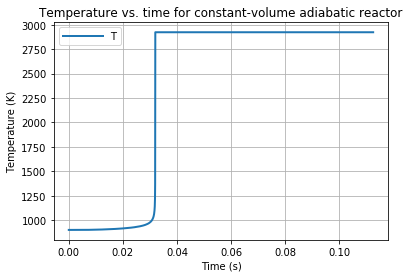

In [9]:
# plot the time evolution of temperature
fig, ax = plt.subplots()
ax.plot(timeHistory.index, timeHistory['temperature'], label='T', lw=2)
ax.set(xlabel='Time (s)',
       ylabel='Temperature (K)',
       title ='Temperature vs. time for constant-volume adiabatic reactor')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("T_vs_t_c7h16.pdf")

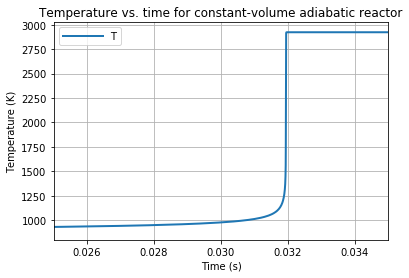

In [10]:
# zoom in
fig, ax = plt.subplots()
ax.plot(timeHistory.index, timeHistory['temperature'], label='T', lw=2)
ax.set(xlim=(0.025,0.035),
       xlabel='Time (s)',
       ylabel='Temperature (K)',
       title ='Temperature vs. time for constant-volume adiabatic reactor')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("T_vs_t_c7h16.pdf")

The ignition delay time for these initial conditions is approximately 0.032 s.

Now repeat the calculation for iso-octane.

In [11]:
# stoichiometric iso-octane/air at 1000 K, 10 atm
T0   = 900.
p0   = 5.*ct.one_atm
fuel = 'IC8H18'
air  = 'O2:1.0 N2:3.76'
phi  = 1.0

gas.TP = T0,p0
gas.set_equivalence_ratio(phi,fuel,air)
gas()


  gas:

       temperature             900  K
          pressure          506625  Pa
           density         2.04884  kg/m^3
  mean mol. weight          30.262  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy      5.8309e+05        1.765e+07     J
   internal energy      3.3582e+05        1.016e+07     J
           entropy          7537.9        2.281e+05     J/K
    Gibbs function     -6.2011e+06       -1.877e+08     J
 heat capacity c_p          1288.9        3.901e+04     J/K
 heat capacity c_v          1014.2        3.069e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                O2       0.206612          0.21847         -26.2426
                N2        0.77686         0.719138         -23.2292
            IC8H18      0.0165289        0.0623923         -97.3927
     [+1031 minor]          

In [12]:
# define a reactor that is filled with the ideal-gas mixture "gas",
#   and name it "Constant-volume reactor"
reactor = ct.IdealGasReactor(contents=gas,name="Constant-volume reactor")

# add "reactor" to a reactor network named "reactorNetwork:"
reactorNetwork = ct.ReactorNet([reactor])

# create a list of all variables (named "stateVariableNames") for which we will compute and store time-dependent data
stateVariableNames = [reactor.component_name(i) for i in range(reactor.n_vars)]

# create a Pandas DataFrame named "timeHistory", using the state variable names as column headings
timeHistory = pd.DataFrame(columns=stateVariableNames)

# store the initial condition
t = 0.
timeHistory.loc[t] = reactor.get_state()

# specify the integration end time in seconds
t_end = 0.10 # (s)

# get the current computer time "ctim0"
ctim0 = time.time()

# perform the time integration
counter = 1;
while(t <= t_end):
    t = reactorNetwork.step()
    if (counter%10 == 0):
        timeHistory.loc[t] = reactorNetwork.get_state()
    counter+=1

# make sure that the final time step is included in timeHistory
timeHistory.loc[t] = reactorNetwork.get_state()

# get the current computer time "ctim1"
# the computer time needed to solve the initial-value problem is then the difference between ctim1 and ctim0
ctim1 = time.time()
ctime = ctim1 - ctim0

# print the final integration time and computer time required
print('Reached time {:.3e} seconds. Needed {:3.2f}s to compute'.format(t,ctime))

Reached time 1.163e-01 seconds. Needed 157.90s to compute


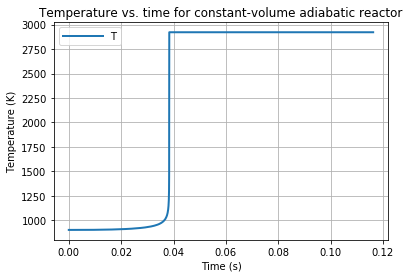

In [13]:
# plot the time evolution of temperature
fig, ax = plt.subplots()
ax.plot(timeHistory.index, timeHistory['temperature'], label='T', lw=2)
ax.set(xlabel='Time (s)',
       ylabel='Temperature (K)',
       title ='Temperature vs. time for constant-volume adiabatic reactor')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("T_vs_t_c8h18.pdf")

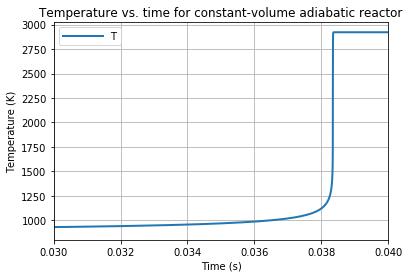

In [14]:
# zoom in
fig, ax = plt.subplots()
ax.plot(timeHistory.index, timeHistory['temperature'], label='T', lw=2)
ax.set(xlim=(0.030,0.040),
       xlabel='Time (s)',
       ylabel='Temperature (K)',
       title ='Temperature vs. time for constant-volume adiabatic reactor')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("T_vs_t_c7h16.pdf")

The ignition delay time is approximately 0.038 s.

For these conditions, the ignition delay time for iso-octane is longer than that for n-heptane, as expected. It is straightforward to repeat the calculations for different initial conditions (temperature, pressure, fuel composition, and equivalence ratio). 

To compare the ignition behaviors of different fuels, or to compare experimental results with those from numerical calculcations, the results are often plotted as ignition delay time versus 1/T0, where T0 is the initial temperature, for a given initial pressure and equivalence ratio. We will generate and examine such plots when we get to Chapter 6, where we formally add an energy equation to our tookit. We have effectively been using an energy equation in the adiabatic constant-volume and adiabatic constant-pressure cases that we have considered since Notebook 4_3_Constant_volume_reactor.

## 4. What's next

We will be using reaction mechanisms of varying sizes levels of detail through the remainder of our introductory study of combustion, focusing primarily on gas-phase combustion. In particular, in Chapter 6, we will add an energy equation in addition to the species equations, and will consider several homogeneous systems. There we will look more closely at ignition characteristics, using various chemical mechanisms. In Chapters 7-9, we will add molecular transport, and will apply the resulting equations to laminar flames. In Chapter 15, we will look more closely at pollutant emissions, in which reaction kinetics plays an important role. And in Chapter 17, we will take a closer look at fuels, including both real and surrogate fuels.